## Day 21 Lecture 2 Assignment

In this assignment, we will apply techniques for identifying and dealing with outliers to a dataset containing information about Uber rides.

In [175]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [176]:
uber_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/uber_rides.csv')

In [177]:
uber_data.head()

,trip_uid,trip_time,total_time,wait_time,price_rub,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed,cloudness
0,ee89076fd9da9bddf5f096b0ca42f8d5,0:21:33,0:29:00,0:07:27,265,5.17,9.29,12,12,0.69,4.81,0.78
1,518be51d403944a03c47e8d1f2c87311,0:19:27,0:26:00,0:06:33,255,4.97,9.93,10,10,0.70,6.53,0.66
2,6e460cc8a12c3c6568d0d4a67ac58393,1:06:53,1:23:00,0:16:07,644,13.01,18.01,14,14,0.61,5.25,0.86
3,49613a86a04e6c15d72b51d1a2935d81,0:13:37,0:20:00,0:06:23,1287,25.99,5.10,3,3,0.84,0.87,0.56
4,9896148fdecdb4c5d977a8691510bdb6,0:38:54,0:49:00,0:10:06,665,13.43,21.92,3,1,0.90,1.61,0.31


Before we identify outliers in the given columns, we need to address three time columns (trip_time, total_time, and wait_time), which are provided as formatted strings (HH:MM:SS) instead of numeric values. Convert the values in these three columns into their numeric equivalents in minutes - "2:15" should be converted to "2.25", "1:22:30" should be converted to "82.5", and so on. You may find it helpful to write a function that does this and use the .apply() function to apply it to all of the necessary columns.

In [178]:
# answer goes here

def to_minutes(series):
    series = series.apply(lambda x: pd.datetime.strptime(x, '%H:%M:%S'))
    series = series.dt.hour*60 + series.dt.minute + series.dt.second/60
    return series

time_cols = ['trip_time', 'total_time', 'wait_time']

uber_data[time_cols] = uber_data[time_cols].apply(lambda x: to_minutes(x))
uber_data

,trip_uid,trip_time,total_time,wait_time,price_rub,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed,cloudness
0,ee89076fd9da9bddf5f096b0ca42f8d5,21.550000,29.0,7.450000,265,5.17,9.29,12,12,0.69,4.81,0.78
1,518be51d403944a03c47e8d1f2c87311,19.450000,26.0,6.550000,255,4.97,9.93,10,10,0.70,6.53,0.66
2,6e460cc8a12c3c6568d0d4a67ac58393,66.883333,83.0,16.116667,644,13.01,18.01,14,14,0.61,5.25,0.86
3,49613a86a04e6c15d72b51d1a2935d81,13.616667,20.0,6.383333,1287,25.99,5.10,3,3,0.84,0.87,0.56
4,9896148fdecdb4c5d977a8691510bdb6,38.900000,49.0,10.100000,665,13.43,21.92,3,1,0.90,1.61,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...
673,ce5bdea8e9c366b2f9f9cdf1bb879965,10.616667,12.0,1.383333,161,2.60,5.79,6,4,0.39,2.57,0.18
674,3a1df88ce67d8f749ac5f09da8b4dadf,23.683333,37.0,13.316667,241,3.92,11.46,7,3,0.62,5.37,0.48
675,1879ce44367d4cc555479253323ec36d,16.333333,35.0,18.666667,174,2.78,6.68,8,6,0.76,4.02,0.9
676,7a237cb245b6ca854498ecb7c842beb3,19.316667,23.0,3.683333,209,3.33,7.48,9,7,0.68,4.28,0.79


Plot histograms for each of the column, excluding the trip ID. Which features appear to have outliers? What do you suspect the nature of these outliers is (i.e. do you think these are most likely data errors, or correct values that are simply unusually large or small?)

I believe that the outliers are true values. Some trips are just really long lol


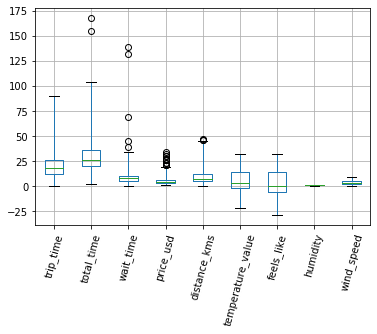

In [179]:
# answer goes here

cols = list(uber_data.columns)

cols.remove('trip_uid')

uber_data.loc[:,cols].boxplot(whis=5)
plt.xticks(rotation=75)

print('I believe that the outliers are true values. Some trips are just really long lol')

Using Tukey's IQR method and a threshold value of 1.5, how many trips have trip_time values that are identified as outliers? Print these trips out.

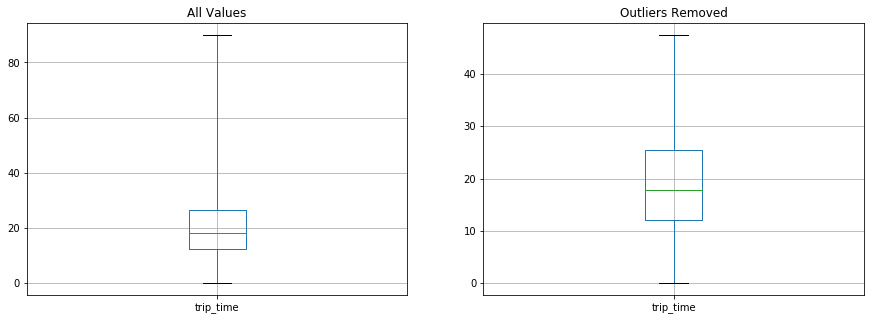

,trip_uid,trip_time,total_time,wait_time,price_rub,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed,cloudness
2,6e460cc8a12c3c6568d0d4a67ac58393,66.883333,83.0,16.116667,644,13.01,18.01,14,14,0.61,5.25,0.86
13,36695e9088a840d3f7476e86294aa846,50.216667,64.0,13.783333,228,4.20,9.41,29,31,0.63,5.11,0.75
29,72801dd197d168a38ebaa88875492d60,68.066667,88.0,19.933333,1500,27.29,21.22,16,16,0.66,5.75,0.62
45,f981dcaa5c7120490cdd38357b78c79c,48.216667,57.0,8.783333,1800,33.55,19.14,15,15,0.41,5.95,0.46
47,e4004a6b46e6e1556f76f63f295a3f37,62.016667,77.0,14.983333,593,10.46,15.63,14,14,0.91,4.70,0.79
79,51785bfdf539132f5304a7ae1e1a6d9e,53.216667,60.0,6.783333,518,7.84,13.78,16,16,0.67,4.67,0.75
106,176e430aa7aafb4472cb09677d05fc2b,51.050000,57.0,5.950000,1000,15.43,36.50,9,6,0.65,4.82,0.31
108,22f1e9c384f584cf65c51555e5428703,85.316667,103.0,17.683333,1000,16.00,46.04,-3,-3,0.97,0.95,0.18
117,ab98f8918dff094689ae1657dadb6bbd,71.200000,81.0,9.800000,669,10.17,17.32,-2,-7,0.75,4.86,0.84
201,5383e6be5bc4f5edc74d2a22a422e30f,47.966667,57.0,9.033333,349,5.28,9.54,21,21,0.82,2.64,0.8


In [180]:
# answer goes here

threshold = 1.5
q75, q25 = np.percentile(uber_data['trip_time'], [75,25])
iqr = q75 - q25
min_val = q25 - (iqr*threshold)
max_val = q75 + (iqr*threshold)
plt.figure(figsize=(15,5))
plt.subplot(121)
uber_data[['trip_time']].boxplot(whis=5)
plt.title('All Values')
plt.subplot(122)
# no_outliers_data = uber_data.loc[uber_data['trip_time'].between(min_val, max_val, inclusive=False)]
# no_outliers_data[['trip_time']].boxplot(whis=5)
uber_data.loc[(uber_data['trip_time'] < max_val) &
           (uber_data['trip_time'] >min_val),
           ['trip_time']].boxplot(whis=5)
plt.title('Outliers Removed')
plt.show()

uber_data.loc[(uber_data['trip_time'] >= max_val) |
           (uber_data['trip_time'] <= min_val)]

There are various ways of handling outliers, including "clipping" (also called "winsorizing"). Clip the outliers to the appropriate upper/lower threshold calculated as part of Tukey's method. Plot the histogram for trip_time after clipping; how does it look different?

0.04424778761061947
Trip Time histogram before winsorizing


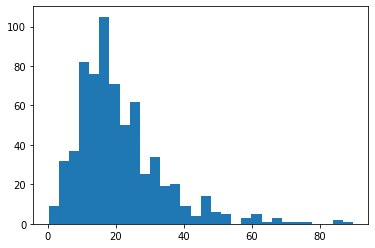

Trip Time histogram after winsorizing


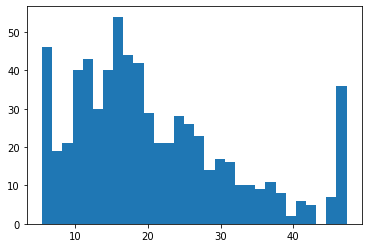

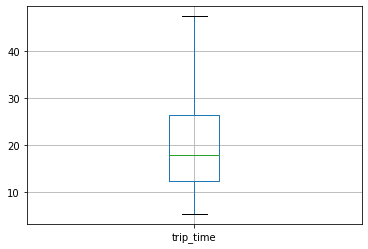

In [181]:
# answer goes here

from scipy.stats.mstats import winsorize

percentile = uber_data.loc[uber_data.trip_time >= max_val, 'trip_time'].count() / uber_data.trip_time.count()
print(percentile)

print('Trip Time histogram before winsorizing')
plt.hist(uber_data.trip_time, bins=30)
plt.show()

uber_data['trip_time'] = winsorize(uber_data['trip_time'], percentile)

print('Trip Time histogram after winsorizing')
plt.hist(uber_data.trip_time, bins=30)
plt.show()

uber_data[['trip_time']].boxplot()